# Analysez les ventes de votre entreprise

In [1]:
#Importation des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Mission 1: traitement des valeurs manquantes et des valeurs aberrantes

### -Table transactions

In [2]:
# Lecture de la table
transactions = pd.read_csv("transactions.csv", parse_dates=[1], sep=',', header=0)
# Lecture de l'en-tête
transactions.info()
transactions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337016 entries, 0 to 337015
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     337016 non-null  object
 1   date        337016 non-null  object
 2   session_id  337016 non-null  object
 3   client_id   337016 non-null  object
dtypes: object(4)
memory usage: 10.3+ MB


,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242


### -Table clients

In [3]:
# Lecture de la table
customers=pd.read_csv('customers.csv', sep=',', header=0)
# Lecture de l'en-tête
customers.info()
customers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


### -Table Produits

In [4]:
# Lecture de la table
products=pd.read_csv('products.csv', sep=',', header=0)
# Lecture de l'en-tête
products.info()
products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


### Création dataframe df_1

In [5]:
# Jointure externe transactions & customers
df=pd.merge(transactions, customers, on='client_id', how='inner')
# Jointure esterne df & products
df_1=pd.merge(df, products, on='id_prod', how='left')
# ordonner les colonnes
df_1=df_1[['client_id','sex','birth','session_id','categ','id_prod','price','date']]
df_1

,client_id,sex,birth,session_id,categ,id_prod,price,date
0,c_4450,f,1977,s_18746,0.0,0_1483,4.99,2021-04-10 18:37:28.723910
1,c_4450,f,1977,s_88567,1.0,1_596,11.12,2021-09-12 02:11:24.774608
2,c_4450,f,1977,s_87835,1.0,1_278,19.18,2021-09-10 15:09:01.555889
3,c_4450,f,1977,s_39094,0.0,0_1447,4.99,2021-05-25 00:17:56.841054
4,c_4450,f,1977,s_69919,0.0,0_1357,15.99,2021-08-01 10:43:25.039433
...,...,...,...,...,...,...,...,...
337011,c_4540,m,2003,s_129519,2.0,2_147,181.99,2021-12-05 00:31:15.530765
337012,c_5139,f,2000,s_15300,2.0,2_19,69.99,2021-04-03 07:31:36.674313
337013,c_5139,f,2000,s_72476,2.0,2_37,48.99,2021-08-07 07:54:38.543403
337014,c_4679,f,1930,s_43928,1.0,1_493,10.99,2021-06-04 11:35:01.467509


### Exloration  du dataframe df_1

In [6]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337016 entries, 0 to 337015
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   client_id   337016 non-null  object 
 1   sex         337016 non-null  object 
 2   birth       337016 non-null  int64  
 3   session_id  337016 non-null  object 
 4   categ       336913 non-null  float64
 5   id_prod     337016 non-null  object 
 6   price       336913 non-null  float64
 7   date        337016 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 23.1+ MB


In [7]:
# statistiques descriptives
df_1.describe()

,birth,categ,price
count,337016.000000,336913.000000,336913.000000
mean,1977.837150,0.429900,17.204376
std,13.531686,0.590999,17.855658
min,1929.000000,0.000000,-1.000000
25%,1971.000000,0.000000,8.580000
50%,1980.000000,0.000000,13.900000
75%,1987.000000,1.000000,18.990000
max,2004.000000,2.000000,300.000000


### Gestion des doublons

In [8]:
# recherche doublons
df_1.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
337011    False
337012    False
337013    False
337014    False
337015    False
Length: 337016, dtype: bool

In [9]:
# nombre de doublons 
df_1.duplicated().sum()

126

In [10]:
#afficher les doublons  
df_1[df_1.duplicated()]
#créer d'un sous-echantillon du dataframe contenant les tests car il semble que ce sont des clients et des transactions fictives
test_df_1=df_1[df_1.duplicated()]
test_df_1

,client_id,sex,birth,session_id,categ,id_prod,price,date
98704,ct_1,m,2001,s_0,0.0,T_0,-1.0,test_2021-03-01 02:30:02.237412
98705,ct_1,m,2001,s_0,0.0,T_0,-1.0,test_2021-03-01 02:30:02.237439
98708,ct_1,m,2001,s_0,0.0,T_0,-1.0,test_2021-03-01 02:30:02.237412
98710,ct_1,m,2001,s_0,0.0,T_0,-1.0,test_2021-03-01 02:30:02.237424
98712,ct_1,m,2001,s_0,0.0,T_0,-1.0,test_2021-03-01 02:30:02.237443
...,...,...,...,...,...,...,...,...
217612,ct_0,f,2001,s_0,0.0,T_0,-1.0,test_2021-03-01 02:30:02.237437
217613,ct_0,f,2001,s_0,0.0,T_0,-1.0,test_2021-03-01 02:30:02.237438
217614,ct_0,f,2001,s_0,0.0,T_0,-1.0,test_2021-03-01 02:30:02.237436
217615,ct_0,f,2001,s_0,0.0,T_0,-1.0,test_2021-03-01 02:30:02.237445


In [11]:
#exploration des modalités du dataframe test_df_1
for key,value in df_1.iteritems():
    print("{}: {}".format(key,len(test_df_1[key].unique())))

client_id: 2
sex: 2
birth: 1
session_id: 1
categ: 1
id_prod: 1
price: 1
date: 36


<div class ="alert alert-block alert-success"> 
    
Cette recherche de doublons nous à conduit à decouvrir des valeurs atypiques dans date qui semblent être des tests de transactions effectués sur une session le 1 mars 2021 à 02h30mn sur quelques tiers de la second 2 et qui concernerait 1 produit, 2 clients à priori fictifs. 
    
$ \ $
    
Nous allons toutes les regrouper dans un sous echantillon pour conserver les données de test.
    
$ \ $
        
Pour ce faire, nous allons utiliser la variable session_id pour regrouper toutes les modalités de test "s_0".
    
</div>

In [12]:
#création d'un sous-echantillon du dataframe contenant les modalité tests qui contiennes des doublons
# car il semble que ce sont des clients et des transactions fictives
testValues=df_1[df_1['session_id'].str.contains('s_0')][['client_id','sex','birth','session_id','categ','id_prod','price','date']]
testValues

,client_id,sex,birth,session_id,categ,id_prod,price,date
98695,ct_1,m,2001,s_0,0.0,T_0,-1.0,test_2021-03-01 02:30:02.237420
98696,ct_1,m,2001,s_0,0.0,T_0,-1.0,test_2021-03-01 02:30:02.237446
98697,ct_1,m,2001,s_0,0.0,T_0,-1.0,test_2021-03-01 02:30:02.237414
98698,ct_1,m,2001,s_0,0.0,T_0,-1.0,test_2021-03-01 02:30:02.237434
98699,ct_1,m,2001,s_0,0.0,T_0,-1.0,test_2021-03-01 02:30:02.237412
...,...,...,...,...,...,...,...,...
217612,ct_0,f,2001,s_0,0.0,T_0,-1.0,test_2021-03-01 02:30:02.237437
217613,ct_0,f,2001,s_0,0.0,T_0,-1.0,test_2021-03-01 02:30:02.237438
217614,ct_0,f,2001,s_0,0.0,T_0,-1.0,test_2021-03-01 02:30:02.237436
217615,ct_0,f,2001,s_0,0.0,T_0,-1.0,test_2021-03-01 02:30:02.237445


In [13]:
# création table csv
testValues.to_csv('transactionsTests.csv',index=False)
# préparation à la supression de df_1
testValues=df_1[df_1['session_id'].str.contains('s_0')][['client_id','sex','birth','session_id','categ','id_prod','price','date']].index

In [14]:
# visualisation du nombre de variables et de modalités
df_1.shape

(337016, 8)

In [15]:
# effacer toutes les lignes de tests de transactions
df_1.drop(testValues, inplace=True)

In [16]:
# visualisation du nombre de variables et de modalités restantes
df_1.shape

(336816, 8)

In [17]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336816 entries, 0 to 337015
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   client_id   336816 non-null  object 
 1   sex         336816 non-null  object 
 2   birth       336816 non-null  int64  
 3   session_id  336816 non-null  object 
 4   categ       336713 non-null  float64
 5   id_prod     336816 non-null  object 
 6   price       336713 non-null  float64
 7   date        336816 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 23.1+ MB


In [18]:
# formatage de date
df_1['date'] = pd.to_datetime(df_1['date'], format='%Y-%m-%d %H:%M:%S.%f')

In [19]:
# trier le dataframe par date
df_1=df_1.sort_values(by="date")

<div class ="alert alert-block alert-success"> 
On a crée un sous-echantillon testValues à partir de 200 valeurs atypiques dont 126 doublons afin de garder les informations de test, puis on les a supprimés totalement du dataframe principale df_1. 
</div>

### Gestion de la cohérence des modalités par type de variables

In [20]:
#verification du nombre de modalités par variable
# on emploi ici la methode iteritems() qui permet d(itéerer sur (colonne,nom_colonne)
for key,value in df_1.iteritems():
    print("{}: {}".format(key,len(df_1[key].unique())))

client_id: 8600
sex: 2
birth: 76
session_id: 169194
categ: 4
id_prod: 3265
price: 1443
date: 336816


###### Variables qualitatives nominales

In [21]:
# Gestion de la cohérence des modalité des variables qualitatives nominales
df_VarQualiNom=df_1[['client_id','sex','session_id','categ','id_prod']]
cols=df_VarQualiNom.columns
for col in cols:
    effectifs = df_VarQualiNom[col].value_counts()
    tab = pd.DataFrame(effectifs, columns = [col])
    tab["n"] = effectifs.values
    tab["f"] = tab["n"] / len(df_1)
    print (tab)

        client_id      n         f
c_1609      12855  12855  0.038166
c_6714       4473   4473  0.013280
c_3454       3275   3275  0.009723
c_4958       2562   2562  0.007607
c_2140        195    195  0.000579
...           ...    ...       ...
c_5401          1      1  0.000003
c_890           1      1  0.000003
c_8005          1      1  0.000003
c_4391          1      1  0.000003
c_5962          1      1  0.000003

[8600 rows x 3 columns]
      sex       n         f
m  169241  169241  0.502473
f  167575  167575  0.497527
          session_id   n         f
s_118668          14  14  0.000042
s_21005           13  13  0.000039
s_96857           13  13  0.000039
s_93892           12  12  0.000036
s_168560          12  12  0.000036
...              ...  ..       ...
s_75496            1   1  0.000003
s_75495            1   1  0.000003
s_75492            1   1  0.000003
s_75491            1   1  0.000003
s_172424           1   1  0.000003

[169194 rows x 3 columns]
      categ       n     

In [22]:
# transformation du dtype de categ en categorie
df_1['categ'] = df_1['categ'].astype("category")

In [23]:
# Vérification par liste de la variable 'categ' puis des autres variables pour visualiser les valeurs
list(set(df_1['categ'].values.tolist()))

[0.0,
 1.0,
 2.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

<div class ="alert alert-block alert-success"> 
    
On remarque que la variable categ compte 4 types de modalités
, or il apprait que 3 types de valeurs dans les modalités quand on verifie leur cohérence. 
Aussi, après un listing il apprait qu'il s'agit de Nan.On traitera ces Nan dans la prochaine partie. 
    
</div>

###### Variables qualitatives ordinales

In [24]:
# Gestion de la cohérence des modalités des variables qualitatives ordinales
df_VarQualiOrdin=df_1[['birth','date']]
cols=df_VarQualiOrdin.columns
for col in cols:
    effectifs = df_VarQualiOrdin[col].value_counts()
    tab = pd.DataFrame(effectifs, columns = [col])
    tab["n"] = effectifs.values
    tab["f"] = tab["n"] / len(df_1)
    print (tab)

      birth      n         f
1980  23880  23880  0.070899
1979  12424  12424  0.036887
1988  12408  12408  0.036839
1978  12279  12279  0.036456
1986  11824  11824  0.035105
...     ...    ...       ...
1932    159    159  0.000472
1935    144    144  0.000428
1930    115    115  0.000341
1929     86     86  0.000255
1931     84     84  0.000249

[76 rows x 3 columns]
                            date  n         f
2021-03-01 00:01:07.843138     1  1  0.000003
2021-11-08 19:52:35.819905     1  1  0.000003
2021-11-08 19:48:51.965818     1  1  0.000003
2021-11-08 19:46:59.642536     1  1  0.000003
2021-11-08 19:42:14.270127     1  1  0.000003
...                          ... ..       ...
2021-07-01 06:37:30.015500     1  1  0.000003
2021-07-01 06:35:09.640392     1  1  0.000003
2021-07-01 06:34:22.046530     1  1  0.000003
2021-07-01 06:33:47.006289     1  1  0.000003
2022-02-28 23:59:58.040472     1  1  0.000003

[336816 rows x 3 columns]


In [25]:
# Exploration du comportement de la variable temps par mois pour repérer d'éventuelles autres anomalies
df_1['mois'] = df_1.date.dt.month
df_month=df_1[['client_id','sex','birth','session_id','categ','id_prod','price','mois']]
df_month

,client_id,sex,birth,session_id,categ,id_prod,price,mois
292369,c_329,f,1967,s_1,0.0,0_1259,11.99,3
272963,c_664,m,1960,s_2,0.0,0_1390,19.37,3
186140,c_580,m,1988,s_3,0.0,0_1352,4.50,3
179450,c_7912,f,1989,s_4,0.0,0_1458,6.55,3
284790,c_2033,f,1956,s_5,0.0,0_1358,16.49,3
...,...,...,...,...,...,...,...,...
188135,c_5787,f,1986,s_172422,1.0,1_456,28.27,2
126798,c_1460,m,1989,s_172423,1.0,1_370,13.11,2
34851,c_1876,m,1983,s_172424,0.0,0_1538,8.61,2
126810,c_1460,m,1989,s_172423,0.0,0_1403,15.99,2


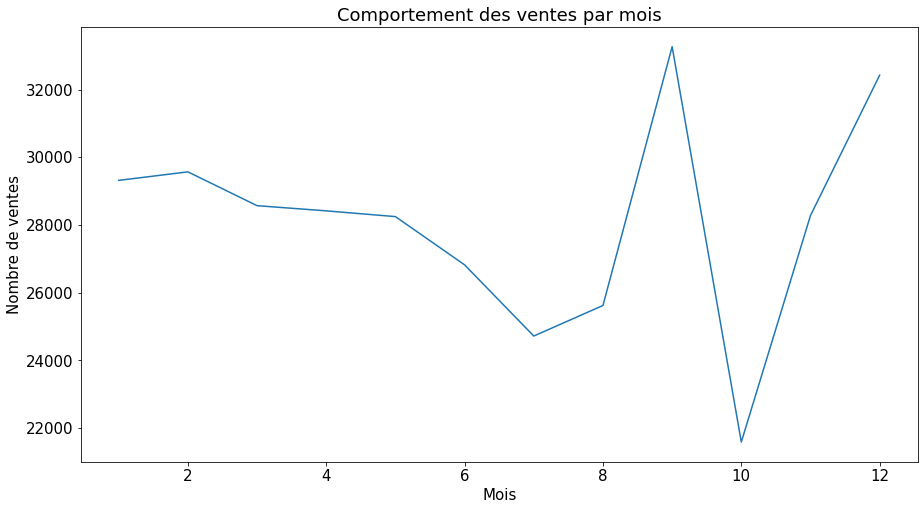

In [26]:
# visualisation de la courbe du temps par mois
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(15,8))
plt.grid()
df_month.mois.value_counts().sort_index().plot()
plt.ylabel("Nombre de ventes")
plt.xlabel("Mois")
plt.title("Comportement des ventes par mois");

In [27]:
# Restriction du dataframe au mois d'octobre
df_1['mois'] = df_1.date.dt.month
octobre=df_month[(df_month.mois == 10)]
octobre

,client_id,sex,birth,session_id,categ,id_prod,price,mois
74180,c_5907,f,1991,s_98170,0.0,0_1145,6.99,10
160691,c_7614,m,1995,s_98169,1.0,1_622,17.41,10
77753,c_4492,f,1980,s_98171,1.0,1_202,19.96,10
247780,c_2588,m,1989,s_98172,0.0,0_2268,17.57,10
35182,c_5953,m,1986,s_98173,0.0,0_1421,19.99,10
...,...,...,...,...,...,...,...,...
55467,c_6259,m,1991,s_112940,0.0,0_1108,17.45,10
11950,c_1609,m,1980,s_112948,1.0,1_414,23.83,10
275598,c_1767,f,1983,s_112949,0.0,0_1425,12.99,10
99936,c_3320,m,1976,s_112950,0.0,0_1745,4.99,10


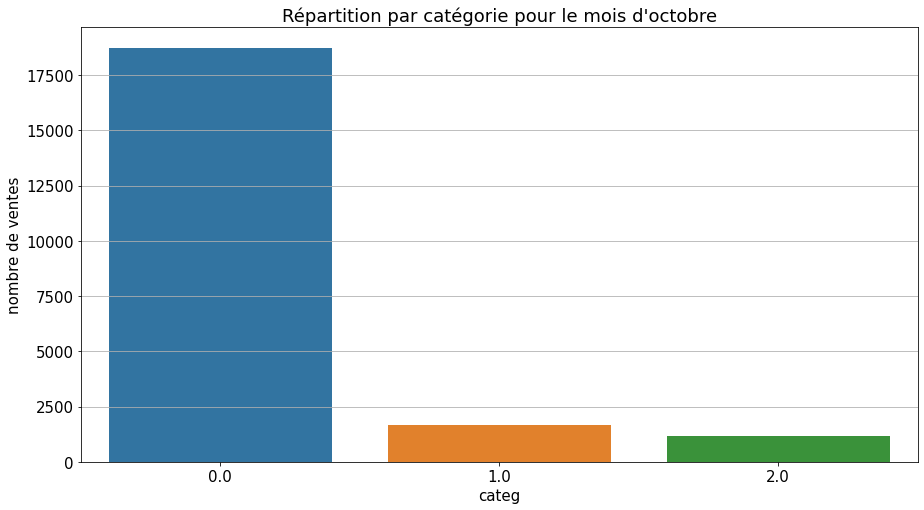

In [28]:
# Exploration de la répartition des ventes par catégorie de produit pour le mois d'octobre
categ_counts = octobre.categ.value_counts().sort_values(ascending=False).iloc[:] 
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(15,8))
plt.grid()
sns.barplot(categ_counts.index, categ_counts.values, order=categ_counts.index)
plt.ylabel("nombre de ventes")
plt.xlabel("categ")
plt.title("Répartition par catégorie pour le mois d'octobre");

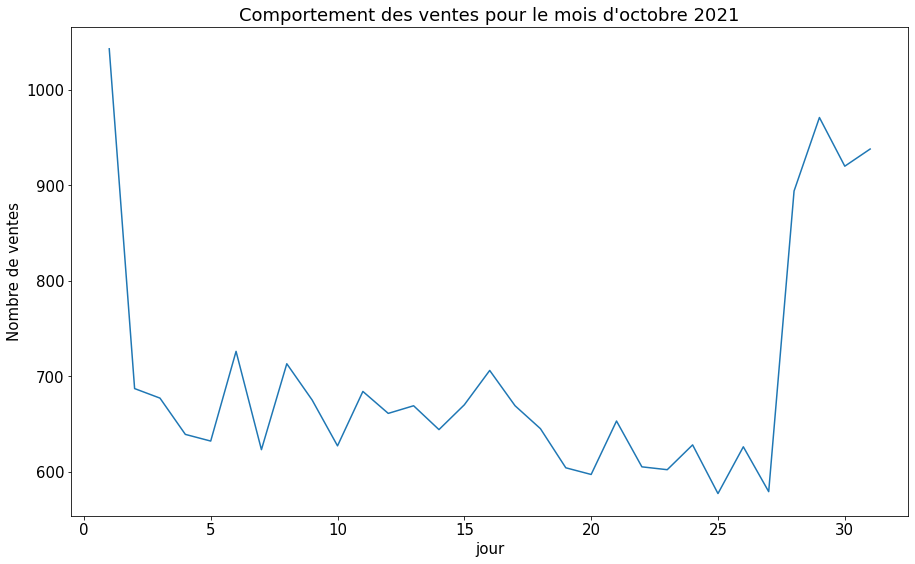

In [29]:
# visualisation du comportement de la courbe du temps sur le mois d'octobre
octobre['jour'] = df_1.date.dt.day
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(15,9))
plt.grid()
octobre.jour.value_counts().sort_index().plot()
plt.ylabel("Nombre de ventes")
plt.xlabel("jour")
plt.title("Comportement des ventes pour le mois d'octobre 2021");

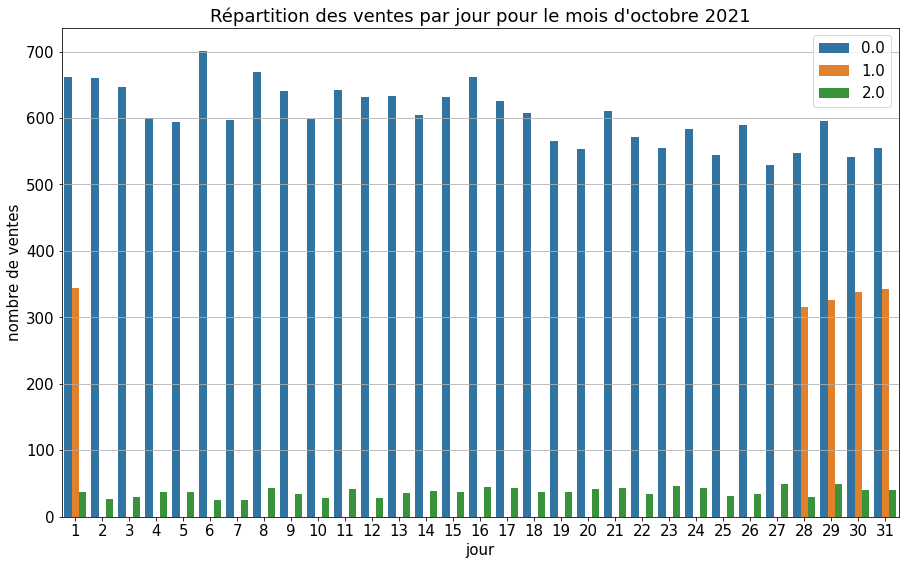

In [30]:
# #visualisation de la répartition des ventes par catégories de produits par jour pour le mois d'octobre par jour
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(15,9))
plt.grid()
sns.countplot('jour', hue='categ', data= octobre)
plt.ylabel("nombre de ventes")
plt.legend()
plt.title("Répartition des ventes par jour pour le mois d'octobre 2021");

<div class ="alert alert-block alert-success"> 
    
Avec ce focus sur la variable date, on a pu mettre en évidence une brutale chute des vente en octobre et qui s'explique en partie par l'<b>absence</b> de vente de produits de <b>'catégorie 1' du 2 au 27 octobre</b> inclus.

$ \ $
    
On peu émettre l'hypothèse d'une rupture de stock eu egard à la période de rentrée scolaire/universitaire ou encore une perte d'information, à savoir, les données ont été supprimées de la base de données.

$ \ $
     
N'ayant pas d'informations supplémentaires, ni de la supply-chain concernant une éventuelle rupture de stock et ni du  service financier sur l'effectivité de mouvements bancaires indiquant que des transactions ont bien eu lieu sur la 'categ 1' pour cette période mais absentes de la base de données. On ne peut décider de la démarche à suivre sans informations supplémentaires.

$ \ $
    
En effet, si nous optons pour une imputation, nous risquons de produire des informations qui ne prendront pas appuie sur la réalité des transactions lors de l'extraction des données, certes, elles seront peut-etre minims voire invisibles sur une année, mais à l'echelle du mois d'octobre celles-ci seront considérables et complétement biaisées par exemple lors d'une analyse par mois d'une années à une autre.

$ \ $
     
Par ailleurs, si nous décidons d'ignorer cette absence le risque et de ne pas produire toute la réalité de l'activité de l'entreprise. 
 
$ \ $
    
Aussi, il s'offre à nous deux possibilités, <b>IMUTER</b>  ou <b>IGNORER</b> , on opte pour <b>IGNORER</b>  dans une démarche de <b>moindre mal</b>, eu egard aux informations mis à disposition dans ce projet.
    
    
</div>

In [31]:
# Vérification par liste de la variable birth
list(set(df_1['birth'].values.tolist()))

[1929,
 1930,
 1931,
 1932,
 1933,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004]

###### Variables quantitatives continues

In [32]:
# Gestion de la cohérance des modalités de la variable quantitative continue price
df_VarQuantiDiscrCont=df_1[['price']]
cols=df_VarQuantiDiscrCont.columns
for col in cols:
    effectifs = df_VarQuantiDiscrCont[col].value_counts()
    tab = pd.DataFrame(effectifs, columns = [col])
    tab["n"] = effectifs.values
    tab["f"] = tab["n"] / len(df_1)
    tab = tab.sort_values([col])
    tab["F"] = tab["f"].cumsum()
    print (tab)

       price      n         f         F
2.48       1      1  0.000003  0.000003
24.42      1      1  0.000003  0.000006
1.28       1      1  0.000003  0.000009
2.15       1      1  0.000003  0.000012
21.84      1      1  0.000003  0.000015
...      ...    ...       ...       ...
5.99    8275   8275  0.024568  0.887966
3.99    8713   8713  0.025869  0.913834
10.99   8949   8949  0.026569  0.940404
4.99    9407   9407  0.027929  0.968333
15.99  10563  10563  0.031361  0.999694

[1442 rows x 4 columns]


In [33]:
# Vérification par liste de la variable price
list(set(df_1['price'].values.tolist()))

[nan,
 nan,
 nan,
 3.75,
 4.5,
 4.0,
 6.75,
 5.25,
 5.75,
 5.0,
 10.75,
 11.25,
 12.82,
 12.14,
 14.2,
 15.59,
 16.49,
 16.99,
 17.49,
 19.37,
 19.99,
 20.99,
 22.99,
 23.99,
 24.47,
 24.81,
 26.99,
 26.05,
 27.03,
 29.99,
 27.99,
 24.98,
 25.99,
 26.61,
 27.61,
 28.0,
 28.54,
 29.44,
 30.25,
 39.99,
 6.5,
 41.31,
 41.99,
 43.09,
 43.35,
 43.99,
 45.99,
 47.91,
 48.99,
 49.61,
 49.99,
 50.99,
 52.26,
 10.0,
 54.87,
 55.99,
 52.72,
 57.99,
 56.99,
 59.14,
 60.96,
 57.04,
 62.99,
 60.99,
 63.99,
 63.36,
 65.75,
 67.57,
 68.99,
 69.99,
 67.99,
 14.25,
 13.5,
 71.99,
 73.18,
 13.0,
 15.5,
 70.0,
 78.83,
 79.99,
 80.99,
 81.19,
 82.99,
 83.99,
 77.63,
 3.25,
 17.75,
 3.0,
 88.99,
 83.63,
 85.28,
 18.75,
 18.0,
 93.99,
 93.48,
 87.4,
 19.75,
 96.69,
 89.43,
 18.25,
 100.99,
 19.5,
 102.82,
 102.99,
 104.06,
 105.24,
 104.99,
 103.92,
 104.76,
 103.58,
 21.75,
 111.72,
 111.99,
 113.99,
 105.99,
 115.75,
 115.93,
 115.3,
 116.99,
 118.51,
 120.22,
 120.61,
 116.98,
 24.75,
 124.99,
 123.99,
 

<div class ="alert alert-block alert-success"> 
    
On à pu mettre en lumière grace à ce travail sur la cohérence des modalités par variable, les valeurs suscéptibles de poser problèmes lors de la phase d'extraction des valeurs pour l'analyse des ventes.
    
$ \ $
        
Aussi, nous allons gérer les NaN et les outliers dans la prochaine partie.
    
</div>

### Gestion des données manquantes

In [34]:
# nombre de manquants Nan
df_1.isnull().sum()

client_id       0
sex             0
birth           0
session_id      0
categ         103
id_prod         0
price         103
date            0
mois            0
dtype: int64

In [35]:
# visualisation des NaN
df_1[df_1.isnull().any(axis=1)]

,client_id,sex,birth,session_id,categ,id_prod,price,date,mois
186047,c_580,m,1988,s_3,NaN,0_2245,NaN,2021-03-01 00:09:29.301897,3
183106,c_8060,f,1979,s_783,NaN,0_2245,NaN,2021-03-02 15:55:49.728644,3
187952,c_1189,m,1985,s_3159,NaN,0_2245,NaN,2021-03-07 20:00:01.525768,3
199145,c_5869,f,1952,s_10427,NaN,0_2245,NaN,2021-03-23 15:57:44.266387,3
320250,c_966,f,1981,s_12567,NaN,0_2245,NaN,2021-03-28 10:46:04.804784,3
...,...,...,...,...,...,...,...,...,...
238778,c_7287,f,1978,s_167926,NaN,0_2245,NaN,2022-02-20 03:50:42.646180,2
35045,c_5953,m,1986,s_169978,NaN,0_2245,NaN,2022-02-24 04:18:45.054650,2
221171,c_6236,f,1976,s_170426,NaN,0_2245,NaN,2022-02-25 00:08:08.736068,2
128763,c_2242,f,1991,s_170548,NaN,0_2245,NaN,2022-02-25 06:36:49.557289,2


In [36]:
# verification s'il s'agit d'un seul produit à l'origine des manquants
df_1[df_1['id_prod'].str.contains('0_2245')][['client_id','sex','birth','session_id','categ','id_prod','price','date']]

,client_id,sex,birth,session_id,categ,id_prod,price,date
186047,c_580,m,1988,s_3,NaN,0_2245,NaN,2021-03-01 00:09:29.301897
183106,c_8060,f,1979,s_783,NaN,0_2245,NaN,2021-03-02 15:55:49.728644
187952,c_1189,m,1985,s_3159,NaN,0_2245,NaN,2021-03-07 20:00:01.525768
199145,c_5869,f,1952,s_10427,NaN,0_2245,NaN,2021-03-23 15:57:44.266387
320250,c_966,f,1981,s_12567,NaN,0_2245,NaN,2021-03-28 10:46:04.804784
...,...,...,...,...,...,...,...,...
238778,c_7287,f,1978,s_167926,NaN,0_2245,NaN,2022-02-20 03:50:42.646180
35045,c_5953,m,1986,s_169978,NaN,0_2245,NaN,2022-02-24 04:18:45.054650
221171,c_6236,f,1976,s_170426,NaN,0_2245,NaN,2022-02-25 00:08:08.736068
128763,c_2242,f,1991,s_170548,NaN,0_2245,NaN,2022-02-25 06:36:49.557289


In [37]:
# Pourcentage des données manquantes par variables
prctManquants=df_1.isna().sum()*100/df_1.shape[0]
round(prctManquants.sort_values(),2)

client_id     0.00
sex           0.00
birth         0.00
session_id    0.00
id_prod       0.00
date          0.00
mois          0.00
categ         0.03
price         0.03
dtype: float64

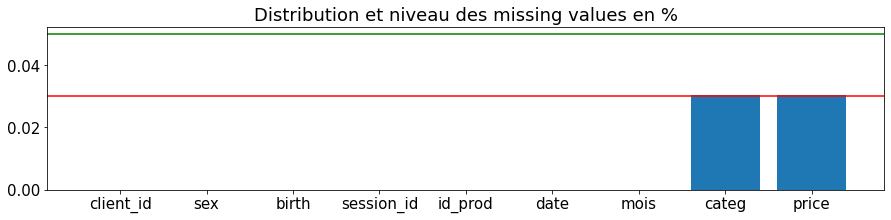

In [38]:
# visualisation du pourcentage de manquants par variables
figManquants=plt.figure(figsize=(15,3))
plt.bar(x=prctManquants.sort_values().index,height=prctManquants.sort_values().values)
plt.axhline(y=0.03,color='r',linestyle=('-'))# pourcentage à 0,03%
plt.axhline(y=0.05,color='g',linestyle=('-'))# pourcentage à 0,05%
plt.title("Distribution et niveau des missing values en %");

<div class ="alert alert-block alert-success"> 
    
On a detecté des valeurs manquantes sur les variables 'categ' et 'price', 
certes, très peu significatives eu egard au nombre de données à notre disposition.

$ \ $
    
Néanmoins, les valeurs manquantes de price et categ sont strictement égales et le résultat de leurs absences est dû au produit '0_2245' eu egard au nombre de modalités concernées (103 rows).On ne va pas les suppimer car cela affecterait la représentativité des produits.

$ \ $
      
Aussi, nous allons essayer de vérfier et confirmer ces causes pour opérer la meilleure stratégie de gestion de ces manquants.
    
</div>

#### Détéction du type de manquant 

<div class ="alert alert-block alert-info"> 

<b>1- Les differentes strategies de gestion pour les Nan:</b>

$ \ $
    
 Tester si <b>MCAR</b> (Missing Completly at Random): évaluer les liaisons entre les variables à problèmes.

$ \ $

-cause: aléa pur
    
-démarche: suppression (eventuellement partielle) si effectif réduit
    
$ \ $
    
 Tester si <b>MAR</b> (Missing at Random): évaluer si les modalités de certaines variables sont liées à celles des variables problèmatiques.
    
$ \ $
    
-cause: les données ne manquent pas de façon complètement aléatoire ; la probabilité d’absence est liée à une ou plusieurs autres variables observées.
    
-démarche: préciser valeur
    
$ \ $
    
 si non <b>MCAR</b> ou <b>MAR</b> alors <b>MNAR</b> (Missing Not at Random):  evaluer le lien entre le manquant et la valeur qui aurait du être.

$ \ $
    
-cause: dépend de la valeur qui "devrait" être observée et juste de la variable en question.
    
-démarche: analyse de sensibilité
        
$ \ $      
        
<b>2-Test basé sur une analyse factorielle des corespondances (AFC) qui se traduit par l'observation des modalités Nan des variables categ et price. </b>

$ \ $
    
<b>Hypothèse nulle H0:</b> la distribution des données est la même entre les Nan de la variable categ et de la variable price.
    
$ \ $
    
<b>Hypothèse alternative H1:</b> la distribution des données n'est pas la même entre les Nan de la variable categ et de la variable price.
 
$ \ $    
   
seuil de signification $\alpha =0,05 $
    
$ \ $
        
$ si P_{value}  \leq \alpha$, on rejette H1 en faveur de H0

$ \ $    

$ si P_{value} > \alpha$, on ne va pas rejeter H1
H0 sera rejetée

$ \ $  
    
Pour cela, on va construir une matrice de contingence pour indiquer si une donnée est manquante ou non.
    
$ \ $
    
On mesurer de cette liaison avec le chi-deux $\chi ^2$:  


$ \displaystyle \chi^2=\sum_{i,j}\frac{(n_{ij}-{\frac {n_i.n_.j}{n}})^2} {\frac {n_i.n_.j}{n}} $

$ \ $    

$i$ Modalité 1er variable
   
$j$ Modalité 2eme variable

$n$ C'est le total du nombre d'observation
    
        
$ \ $
     
Avec le coefficient du $V$ de Cramer's on va estimer la force du lien:

$ \displaystyle V=\sqrt{\frac{\chi^2}{min(k-1,r-1)}}=\sqrt{\frac{\chi^2/n}{min(k-1,r-1)}}$

$ \ $   
    
$\chi ^2$ Derivée du test chi carré de Pearson

$n$ C'est le total du nombre d'observation

$k$ Le nombre de colonnes

$r$ Le nombre de lignes 
    
$ \ $    
            
</div>

### MCAR

In [39]:
# creation dataframe des variables
detectMcar=list(prctManquants[prctManquants>0].index)
detectMcar

['categ', 'price']

In [40]:
# tableau des indicatrices (manquant ou non)
boolDf=1*df_1[detectMcar].isnull()
boolDf.tail()

,categ,price
188135,0,0
126798,0,0
34851,0,0
126810,0,0
126778,0,0


In [41]:
#Fonction Khi2 et V Cramers
from scipy.stats import chi2_contingency

def cramers_V(var1,var2):
    """Evalue par une normalisation du chi-deux entre 0 et 100% 
    la force de la corrélation entre 2 variables catégorielles"""
    crosstab=np.array(pd.crosstab(var1,var2, rownames=None,colnames=None)) # table de contingence
    stat=chi2_contingency(crosstab)# [H0] # Valeur de la statistique du test
    obs=np.sum(crosstab) # nombre d'observation (effectifs)
    mini=min(crosstab.shape)-1 # min(p,q)-1 plus petit du nombre de colonnes ou de lignes moins 1 degré liberté
    return ((np.sqrt(stat[0]/(obs*mini))),stat[1]*100)# cramer : racine carré du Khi2 divisé par (effectifs total multiplier par mini)

In [42]:
# Encodage par transformer des modalités
from sklearn import preprocessing
label=preprocessing.LabelEncoder()
data_encoded=pd.DataFrame()

for i in boolDf.columns: 
    data_encoded[i]=label.fit_transform(boolDf[i])

In [43]:
# L'association avec price indique dans quelle mesure les données sont conformes à l'hypothèse de test 
rows=[]
for var in data_encoded:
    col=[]
    cramers=cramers_V(data_encoded[var], data_encoded.price)[0]
    col.append(round(cramers*100,3))
    rows.append(col)

c_r1=np.array(rows)
df_2=pd.DataFrame(c_r1, columns=['association avec price (%)'],index=data_encoded.columns)

# La p valeur indique dans quelle mesure les données sont conformes à l'hypothèse de test et à ses hypothèses
rows_2=[]

for var in data_encoded:
    col2=[]
    P=cramers_V(data_encoded[var], data_encoded.price)[1]
    col2.append(P)
    rows_2.append(col2)

c_r2=np.array(rows_2)
df_3=pd.DataFrame(c_r2, columns=['P-value (%)'],index=data_encoded.columns)

df_V=pd.concat([df_2,df_3],axis=1)
df_V.sort_values(by='association avec price (%)')

,association avec price (%),P-value (%)
categ,99.514,0.0
price,99.514,0.0


###### Interprétation du coefficient de Cramers V

In [44]:
# interprétation de la valeur du coefficient de Cramer V
Interpret_Vcramers = pd.DataFrame( {"Coefficient de V en %": pd.Categorical(["[0 ; 5%]", "[5 ; 10%]", "[10 ; 20%]", "[20 ; 40%]","[40 ; 100%]"]),"intensité du lien": pd.Categorical(["très faible", "faible", "moyenne", "forte","très forte"]),})
Interpret_Vcramers 

,Coefficient de V en %,intensité du lien
0,[0 ; 5%],très faible
1,[5 ; 10%],faible
2,[10 ; 20%],moyenne
3,[20 ; 40%],forte
4,[40 ; 100%],très forte


###### Interprétation P-valeur

$ si P_{value}  \leq \alpha$, on rejette H1 en faveur de H0

$ si P_{value} > \alpha$, on ne va pas pouvoir rejeter H1
H0 sera rejetée

<div class ="alert alert-block alert-success"> 
Pas de <b>MCAR</b>, il apparait clairement un lien très fort entre  categ et price et il est  hautement significatif du point de vu de la P valeur, il est improble que les manquants de ses deux variables le soient de manière complétement  aléatoire.
</div>

## MAR

<div class ="alert alert-block alert-info"> Recherche de l'association entre les modalités renseignés des variables sans problèmes et la présence ou non de données manquantes des variables à problèmes</div>

In [45]:
#création dataframe detection MAR
detectMar=pd.concat([df_1.drop(detectMcar, axis=1,),boolDf],axis=1)
detectMar

,client_id,sex,birth,session_id,id_prod,date,mois,categ,price
292369,c_329,f,1967,s_1,0_1259,2021-03-01 00:01:07.843138,3,0,0
272963,c_664,m,1960,s_2,0_1390,2021-03-01 00:02:26.047414,3,0,0
186140,c_580,m,1988,s_3,0_1352,2021-03-01 00:02:38.311413,3,0,0
179450,c_7912,f,1989,s_4,0_1458,2021-03-01 00:04:54.559692,3,0,0
284790,c_2033,f,1956,s_5,0_1358,2021-03-01 00:05:18.801198,3,0,0
...,...,...,...,...,...,...,...,...,...
188135,c_5787,f,1986,s_172422,1_456,2022-02-28 23:56:57.196281,2,0,0
126798,c_1460,m,1989,s_172423,1_370,2022-02-28 23:56:57.561424,2,0,0
34851,c_1876,m,1983,s_172424,0_1538,2022-02-28 23:57:12.741573,2,0,0
126810,c_1460,m,1989,s_172423,0_1403,2022-02-28 23:59:02.381670,2,0,0


In [46]:
# Encodage par transformer des modalités
from sklearn import preprocessing
label=preprocessing.LabelEncoder()
data_encoded=pd.DataFrame()

for i in detectMar.columns: 
    data_encoded[i]=label.fit_transform(detectMar[i])

In [47]:
# L'association avec price indique dans quelle mesure les données sont conformes à l'hypothèse de test 
rows=[]
for var in data_encoded:
    col=[]
    cramers=cramers_V(data_encoded[var], data_encoded.price)[0]
    col.append(round(cramers*100,3))
    rows.append(col)

c_r1=np.array(rows)
df_2=pd.DataFrame(c_r1, columns=['association avec price (%)'],index=data_encoded.columns)

# La P valeur  indique dans quelle mesure les données sont conformes à l'hypothèse de test et à ses hypothèses
rows_2=[]
for var in data_encoded:
    col2=[]
    P=cramers_V(data_encoded[var], data_encoded.price)[1]
    col2.append(P)
    rows_2.append(col2)

c_r2=np.array(rows_2)
df_3=pd.DataFrame(c_r2, columns=['P-value (%)'],index=data_encoded.columns)

df_V=pd.concat([df_2,df_3],axis=1)
df_V.sort_values(by='association avec price (%)')

,association avec price (%),P-value (%)
sex,0.280,10.373812
mois,0.515,62.865450
birth,1.843,0.230769
client_id,13.809,100.000000
session_id,68.208,100.000000
categ,99.514,0.000000
price,99.514,0.000000
id_prod,100.000,0.000000
date,100.000,49.918988


<div class ="alert alert-block alert-success"> 
    
La moitié des liens sont hautement significatifs du point de vue de la P valeur, il est donc également peu probable que les manquants le soient de manière complétement aléatoire. Ici, on est face à des données manquantes de type <b>MAR</b> car la probabilité d’absence est liée à plusieurs autres variables observées..

</div>

### Imputation ou Suppression ?

<div class ="alert alert-block alert-info"> 

<b>SUPPRESSION</b>

Si les manquants avaient été de type <b>MCAR</b> et en petit nombre ($<5 \% $ des données), on l'aurait envisagé.                               
       
$ \ $  
    
Or, on a découvert qu'il s'agissait de manquants de type <b>MAR</b> et donc pas <b>MNAR</b>.

$ \ $ 

Aussi, nous allons procèder à une <b>IMPUTATION </b>. 
    
$ \ $ 
    
Pour cela, on va se baser sur la distribution des valeurs disponibles:

$ \ $ 


   -Pour les variable purement quantitatives sans recodage et seulement si symétrique la moyenne ou la médiane.
       
   -Pour les varibales qualitatives on impute le mode si il est bien marqué ou imputer les valeurs les plus frequentes proportionnellement à leurs fréquences relatives.

</div>

</div>

<div class ="alert alert-block alert-success">  
    
En somme, les valeurs manquantes ne sont pas <b>MCAR</b>  car elle ne sont pas manquantes de manière complètement aléatoire et ni <b>MNAR</b> car chaque variable ne dépendent pas uniquement d'elle même , elles sont probablement <b>MAR</b> , à savoir, elles auraient la valeur réelle qui aurait du être là.

$ \ $ 
    
On fera le choix d'une <b>imputation</b> univarié par un parametres de tendance centrale (mode|moyenne|médiane) ou algorithmique en fonction du type de variable. 
    
</div>

### Imputation des MAR

#### Pour la variable quantitative price

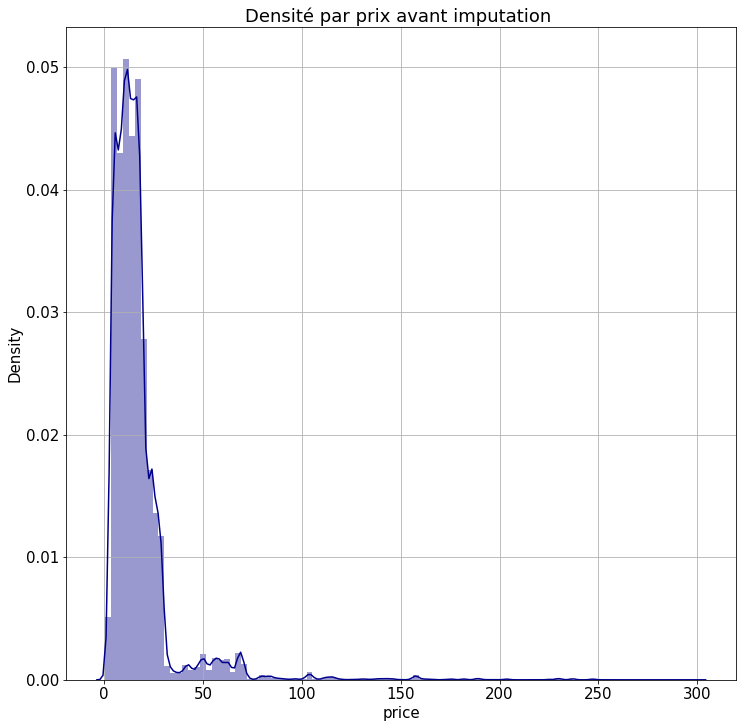

In [48]:
# visualisation de l'histogramme et de l'éstimation de la densité
figPriceDensity=plt.figure(figsize=(12,12))
sns.distplot(df_1.price, hist=True, kde=True, bins=100, color="darkblue")
plt.title("Densité par prix avant imputation ");
plt.grid()

<div class ="alert alert-block alert-warning"> 
Graphiquement il apparait une disymétrie marquée
</div>

In [49]:
# calcul du coefficient d'asymétrie
skew=round(df_1.price.skew(),3)
print("Skewness Price: {}".format(skew))

# calcul du coefficient d'applatissement
kurt=round(df_1.price.kurtosis(),3)
print("Kurtosis Price: {}".format(kurt))

Skewness Price: 5.479
Kurtosis Price: 45.425


<div class ="alert alert-block alert-warning"> 
D'un point de vu numerique, il y a une forte asymétrie vers la droite et un applatissement anormal, cela  est dû aux diffèrentes catègories de prix et outliers
</div>

In [50]:
# calcul de la moyenne et de la médiane ainsi que la proximité entre la moyen,la médiane et ecart type
df_1.price.describe().loc[['mean','50%','std']]

mean    17.215189
50%     13.900000
std     17.855445
Name: price, dtype: float64

In [51]:
# calcul du coefficient de variation la dispersion par unité de moyenne
coefVar=df_1.price.describe().loc['std']/df_1.price.describe().loc['mean']
"Dispersion par unité de moyenne : {}%".format(round(coefVar*100,2))

'Dispersion par unité de moyenne : 103.72%'

<div class ="alert alert-block alert-warning"> 

Afin d'eviter les biais d'interpretation on à calculé le coefficient de variation de la variable price:
    
$ CV=\frac{s}{\bar{x}} $  

$ \ $
    
La variabilité interne de la variable est trop élevée (coefVar > 20%).
    
$ \ $
    
L'imputation par la moyenne est abandonnée au profit de la médiane.
</div>

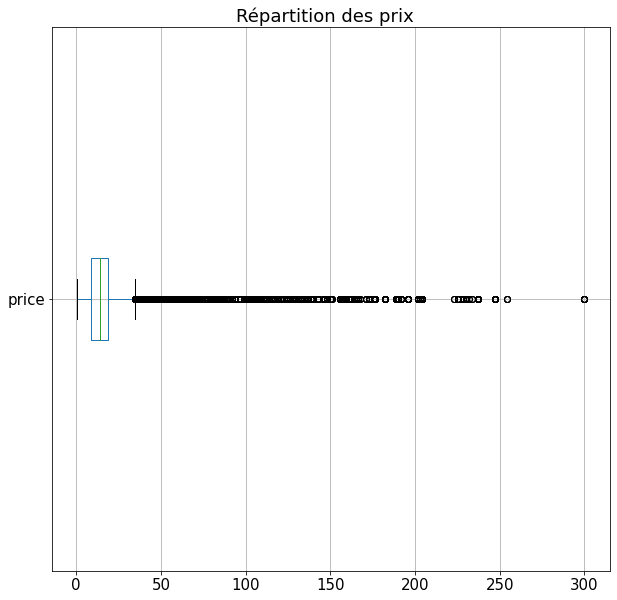

In [52]:
# boite à moustache 
figPriceOutliers=plt.figure(figsize=(10,10))
df_1.boxplot(column="price", vert=False)
plt.title("Répartition des prix  ");
plt.show()

<div class ="alert alert-block alert-warning"> 
Graphiquement on est également conforter à l'idée d'abandonner la moyenne mais aussi la mediane car il y a beaucoup d'outliers.
</div>

<div class ="alert alert-block alert-info"> 
    
Eu egard aux resultats numériques et graphiques, on n'utilisera pas juste un parametre de tendance centrale puisqu'il n'y a pas de symètrie mais une méthode plus robuste d'imputation algorithmique.

$ \ $ 

Ici, on utilisera celle des proches voisins KNNImputer (méthode qui sélectionne les valeurs les plus influentes par agrégation locale) de la librairie SkiLearn.
 
$ \ $     
       
La complétion par $k$ plus proches voisins (k-nearest neighbors ou KNN) consiste à exécuter l’algorithme suivant qui modélise et prévoit les données manquantes.
    
$ \ $ 
       
1.Choix d'un entier $k$ : $1\geq k \geq n $.
    
$ \ $ 
  
2.Calculer les distances : $d(Y_{i^*},Y_i), i=1,...,n$.
    
$ \ $ 
    
3.Retenir les $k$ observations $Y_{i_1},...,Y_{i_k}$ pour lesquelles ces distances sont les       plus petites.
    
$ \ $ 
  
4.Affecter aux valeurs manquantes la moyennne des valeurs des $k$ voisins:  $(y_{ij})_{mis}=y_{{i^*}{j^*}}=\frac {1}{k}(Y_{(ij)}+...+Y_{(ij)})$

$ \ $ 
    
$Y$ Variable
    
$n$ individus
    
$m_{ij}$ valeurs manquantes
</div>

In [53]:
# pour la variable quantitative price une imputation avec KNNImputer
from sklearn.impute import KNNImputer

imputer=KNNImputer(n_neighbors=5)
df_1.price=imputer.fit_transform(np.array(df_1.price).reshape(-1,1))

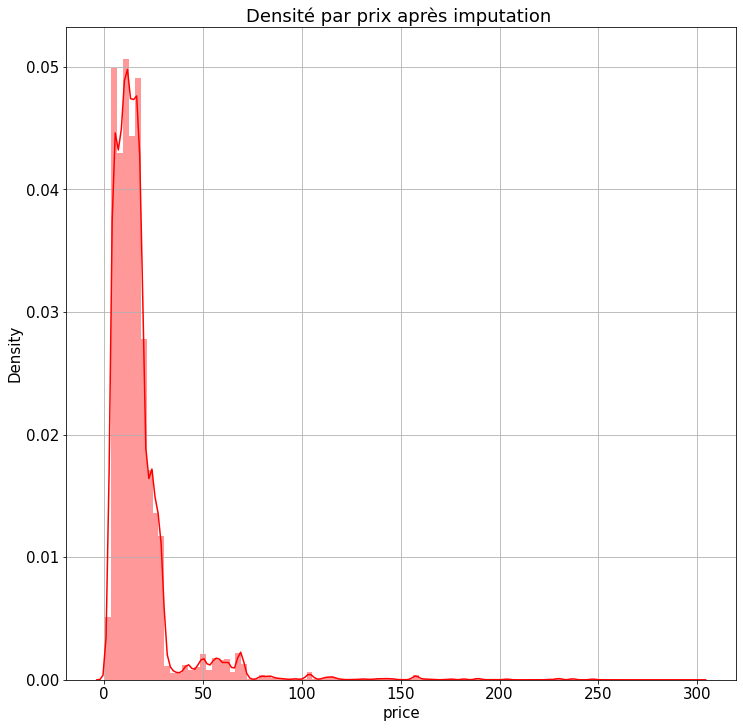

In [54]:
# Visualisation de la distribution imputée
figPriceDensityImput=plt.figure(figsize=(12,12))
sns.distplot(df_1.price, hist=True, kde=True, bins=100, color="red")
plt.grid()
plt.title("Densité par prix après imputation ");

<div class ="alert alert-block alert-info"> 
Graphiquement, les données sont identiques avant et après remplissage des NaN, la répartition n'est pas affectée.
</div>

In [55]:
# verification du remplissage des manquants
df_1.isna().sum()

client_id       0
sex             0
birth           0
session_id      0
categ         103
id_prod         0
price           0
date            0
mois            0
dtype: int64

In [56]:
# verification de la cohérance des valeurs
list(set(df_1['price'].values.tolist()))

[1.25,
 2.41,
 3.75,
 4.5,
 4.0,
 6.75,
 5.25,
 5.75,
 5.0,
 10.75,
 11.25,
 12.82,
 12.14,
 14.2,
 10.0,
 16.49,
 16.99,
 17.21518851366,
 19.37,
 19.99,
 20.99,
 22.99,
 23.99,
 24.47,
 17.49,
 26.99,
 26.05,
 27.03,
 29.99,
 27.99,
 24.81,
 24.98,
 25.99,
 26.61,
 27.61,
 28.0,
 28.54,
 29.44,
 39.99,
 6.5,
 41.31,
 41.99,
 43.09,
 43.35,
 43.99,
 45.99,
 47.91,
 48.99,
 49.61,
 49.99,
 50.99,
 52.26,
 52.72,
 54.87,
 55.99,
 56.99,
 57.99,
 57.04,
 59.14,
 60.96,
 60.99,
 62.99,
 63.99,
 63.36,
 65.75,
 13.5,
 67.57,
 68.99,
 69.99,
 67.99,
 14.25,
 71.99,
 73.18,
 13.0,
 70.0,
 15.5,
 73.72,
 78.83,
 79.99,
 80.99,
 81.19,
 82.99,
 83.99,
 77.63,
 3.25,
 17.75,
 3.0,
 88.99,
 83.63,
 85.28,
 18.75,
 18.0,
 93.99,
 93.48,
 87.4,
 19.75,
 96.69,
 89.43,
 18.25,
 100.99,
 19.5,
 102.82,
 102.99,
 104.06,
 105.24,
 104.99,
 103.92,
 104.76,
 103.58,
 21.75,
 111.72,
 111.99,
 113.99,
 105.99,
 115.75,
 115.93,
 115.3,
 116.99,
 118.51,
 120.22,
 120.61,
 116.98,
 24.75,
 124.99,
 123.

In [57]:
# calcul du coefficient d'asymétrie
skew=round(df_1.price.skew(),3)
print("Skewness Price: {}".format(skew))

# calcul du coefficient d'applatissement
kurt=round(df_1.price.kurtosis(),3)
print("Kurtosis Price: {}".format(kurt))

Skewness Price: 5.48
Kurtosis Price: 45.44


In [58]:
# verification impact sur calcul de la moyenne et de la médiane
df_1.price.describe().loc[['mean','50%','std']]

mean    17.215189
50%     13.940000
std     17.852715
Name: price, dtype: float64

<div class ="alert alert-block alert-info"> 
Numériquement, on constate une légère hausse des parametres après remplissage des NaN,cependant , cette hausse n'affecte pas la répartition des données.
</div>

<div class ="alert alert-block alert-success"> 
En somme, dans une démarche de moindre mal, on a utilisé la methode d'imputation algorithmique des proches voisins KNNImputer de la librairie SkiLearn qui nous à permis d'estimer les modalités manquantes de la variable 'price' sans trop affecter la distribution de l'ensemble des données.
</div>

#### Pour la variable  qualitative  categ

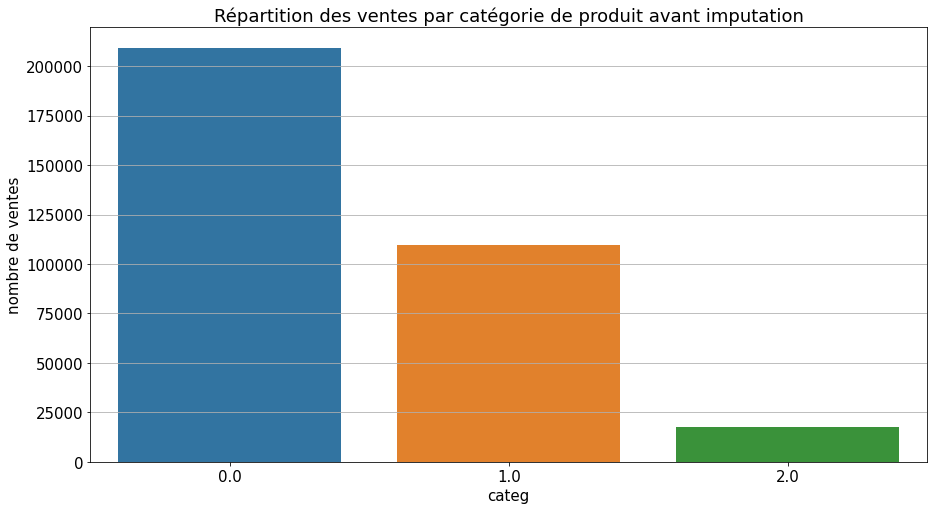

In [59]:
# visualisation de la repartition avant imputation
categ_counts = df_1.categ.value_counts().sort_values(ascending=False).iloc[:] 
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(15,8))
plt.grid()
sns.barplot(categ_counts.index, categ_counts.values, order=categ_counts.index)
plt.ylabel("nombre de ventes")
plt.xlabel("categ")
plt.title("Répartition des ventes par catégorie de produit avant imputation");

<div class ="alert alert-block alert-warning"> 
    
Graphiquement, on observe une distribution des modalités de la variable en escalier, avec un mode '0.0' très marqué .
    
Ici, on à le choix soit d'imputer avec le mode le plus marqué ou par la valeurs la plus frequentes proportionnellement à sa fréquence relative.
</div>

In [60]:
# visualisation de la cohérence des modalités de la variables qualitatives nominales categ
df_VarQualiCateg=df_1[['categ']]
cols=df_VarQualiCateg.columns
for col in cols:
    effectifs = df_VarQualiCateg[col].value_counts()
    tab = pd.DataFrame(effectifs, columns = [col])
    tab["n"] = effectifs.values
    tab["f"] = tab["n"] / len(df_1)
    print (tab)

      categ       n         f
0.0  209426  209426  0.621782
1.0  109735  109735  0.325801
2.0   17552   17552  0.052112


<div class ="alert alert-block alert-info"> 
    
On fait le choix d'imputer avec une methode algorithmique SimpleImputer de la librairie SKlearn avec la strategie 'most_frequent'
</div>

In [61]:
# imputation par most_fréquente avec SimpleImputer de la variable 'categ'
from sklearn.impute import SimpleImputer

medImp=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_1.categ=medImp.fit_transform(np.array(df_1.categ).reshape(-1,1))

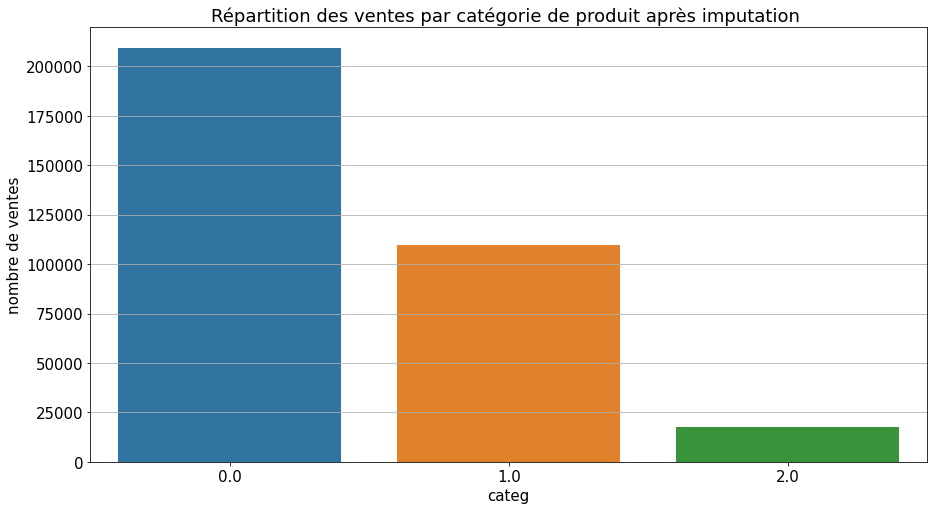

In [62]:
# Visualisation de la repartition après imputation 
categ_counts = df_1.categ.value_counts().sort_values(ascending=False).iloc[:] 
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(15,8))
plt.grid()
sns.barplot(categ_counts.index, categ_counts.values, order=categ_counts.index)
plt.ylabel("nombre de ventes")
plt.xlabel("categ")
plt.title("Répartition des ventes par catégorie de produit après imputation ");

<div class ="alert alert-block alert-info"> 
Graphiquement, les données sont identiques avant et après remplissage des NaN, la répartition n'est pas affectée.
</div>

In [63]:
# vérification du remplissage des modalités manquante
list(set(df_1['categ'].values.tolist()))

[0.0, 1.0, 2.0]

In [64]:
# Gestion de l'impact sur la cohérence des modalités de la variables qualitatives nominales categ
df_VarQualiCateg=df_1[['categ']]
cols=df_VarQualiCateg.columns
for col in cols:
    effectifs = df_VarQualiCateg[col].value_counts()
    tab = pd.DataFrame(effectifs, columns = [col])
    tab["n"] = effectifs.values
    tab["f"] = tab["n"] / len(df_1)
    print (tab)

      categ       n         f
0.0  209529  209529  0.622087
1.0  109735  109735  0.325801
2.0   17552   17552  0.052112


<div class ="alert alert-block alert-info"> 
Numériquement, on constate une légère hausse du mode '0.0' après remplissage des NaN,cependant, cette hausse n'affecte pas la distribution des données.
</div>

<div class ="alert alert-block alert-success"> 
En somme, on a utilisé la methode d'imputation algorithmique SimpleImputer de la librairie SkiLearn avec une stratégie 'most_frequent' qui nous a permis d'estimer les modalités manquantes de la variable 'categ' sans trop affecter la distribution de l'ensemble des données.
</div>

In [65]:
# vérification manquants dans df_1
df_1.isnull().sum()

client_id     0
sex           0
birth         0
session_id    0
categ         0
id_prod       0
price         0
date          0
mois          0
dtype: int64

##### Gestion des outliers

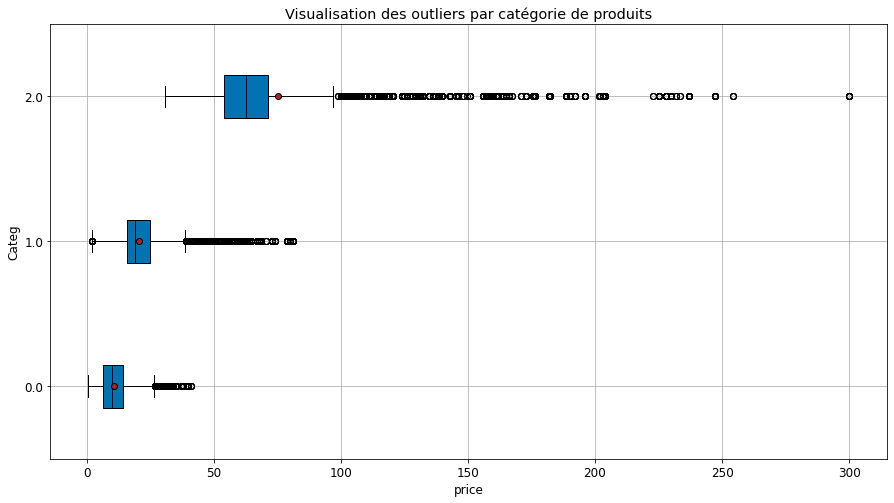

In [66]:
# visualisation des outliers
X1 = "categ" # qualitative
Y2 = "price" # quantitative

# Changement de la palette graphique

sns.set_palette(sns.color_palette("colorblind", 3))
# visualisation boxplots
modalites = df_1[X1].unique()
groupes = []
for m in modalites:
    groupes.append(df_1[df_1[X1]==m][Y2])
    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(15,8))
plt.title("Visualisation des outliers par catégorie de produits");
plt.xlabel('price')
plt.ylabel('Categ')
plt.grid()
plt.boxplot(groupes, labels=modalites, showfliers=True, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

<div class ="alert alert-block alert-warning"> 
    
Graphiquement, on observe des outliers pour chaque catégorie, avec un ecart inter-quartile pour la catégorie 2 plus dispersé que la catégorie 1 et lui meme plus dispérsé que la catégorie 0.

</div>

<div class ="alert alert-block alert-success"> 
Comme nous l'avons vu précédemment, la distribution est fortement asymétrique et nous avons vu dans le dernier boxplot une dispersion présente pour chaque catégorie.
    
$ \ $ 
    
On prend le partie de conclure qu'il s'agit d'un comportement propre à ce secteur d'activité, aussi, on conservera tous les outliers afin de ne pas affecter la représentativité des données et on se montrera prudent quant à l'utilisation d'outils ou de raisonnement concus pour une distribution normale .
</div>

##### Projection du dataframe full

In [67]:
df_full=df_1
df_full

,client_id,sex,birth,session_id,categ,id_prod,price,date,mois
292369,c_329,f,1967,s_1,0.0,0_1259,11.99,2021-03-01 00:01:07.843138,3
272963,c_664,m,1960,s_2,0.0,0_1390,19.37,2021-03-01 00:02:26.047414,3
186140,c_580,m,1988,s_3,0.0,0_1352,4.50,2021-03-01 00:02:38.311413,3
179450,c_7912,f,1989,s_4,0.0,0_1458,6.55,2021-03-01 00:04:54.559692,3
284790,c_2033,f,1956,s_5,0.0,0_1358,16.49,2021-03-01 00:05:18.801198,3
...,...,...,...,...,...,...,...,...,...
188135,c_5787,f,1986,s_172422,1.0,1_456,28.27,2022-02-28 23:56:57.196281,2
126798,c_1460,m,1989,s_172423,1.0,1_370,13.11,2022-02-28 23:56:57.561424,2
34851,c_1876,m,1983,s_172424,0.0,0_1538,8.61,2022-02-28 23:57:12.741573,2
126810,c_1460,m,1989,s_172423,0.0,0_1403,15.99,2022-02-28 23:59:02.381670,2


##### Description des variables
- client_id : il s'agit du numéro de client
- sex: il s'agit du genre sexuel du client
- birth : il s'agit de l'année de naissance du client
- session_id: il s'agit du numéro de session du client
- categ: correspond à une variable qualitative sur les produits en 4 niveaux
- id_prod : il s'agit du type de produit
- price : il s'agit du prix par unité de produit   
- date : il s'agit de la date de session & le delta en secondes passées sur le site (à verifier)

In [68]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336816 entries, 292369 to 126778
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   client_id   336816 non-null  object        
 1   sex         336816 non-null  object        
 2   birth       336816 non-null  int64         
 3   session_id  336816 non-null  object        
 4   categ       336816 non-null  float64       
 5   id_prod     336816 non-null  object        
 6   price       336816 non-null  float64       
 7   date        336816 non-null  datetime64[ns]
 8   mois        336816 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 33.8+ MB


In [69]:
# transformation du dtype de la variable categ
df_full['categ'] = df_full['categ'].astype(int)
df_full['categ'] = df_full['categ'].astype("category")
# creation de la table csv pour l'extraction de données et l'analyse
df_full.to_csv('ventesLibrairie.csv',index=False)

##### Références:

https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4928001-decouvrez-les-statistiques-vocabulaire-et-tour-d-horizon

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

https://towardsdatascience.com/statistical-test-for-mcar-in-python-9fb617a76eac

http://wikistat.fr/pdf/st-m-explo-afd.pdf

https://www.math.univ-toulouse.fr/~besse/Wikistat/pdf/st-m-app-idm.pdf

http://wikistat.fr/pdf/st-m-app-add.pdf